In [2]:
#initialise general libraries
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [3]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [4]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# Ensemble Model
## Kaggle Score: 0.86389, Validation Score: 0.8660807264255539
<img src="adaboo1.png">
Simple ensemble model based on adaboost and decision trees

In [7]:
ada_model1v = AdaBoostClassifier(random_state=1, learning_rate=0.699, n_estimators=60)
ada_model1v.fit(train_Xv, train_yv)
adaprediction1v = ada_model1v.predict_proba(test_Xv)
print("Validation score:",roc_auc_score(test_yv, adaprediction1v[:,1]))

Validation score: 0.8660807264255539


In [5]:
ada_model1 = AdaBoostClassifier(random_state=1, learning_rate=0.699, n_estimators=60)
ada_model1.fit(train_X, train_y)
adaprediction1 = ada_model1.predict_proba(test_X)

In [6]:
adapred1 = {'id': df_test['id'].values,
        'target': adaprediction1[:,1]}
df_adapred1 = DataFrame(adapred1)

df_adapred1 = df_adapred1.reset_index().set_index('id')
df_adapred1 = df_adapred1.drop(columns='index')
df_adapred1.head()

,target
id,
5,0.482112
10,0.491938
11,0.478679
13,0.494087
16,0.470207


In [7]:
df_adapred1.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/adaboo1.csv')

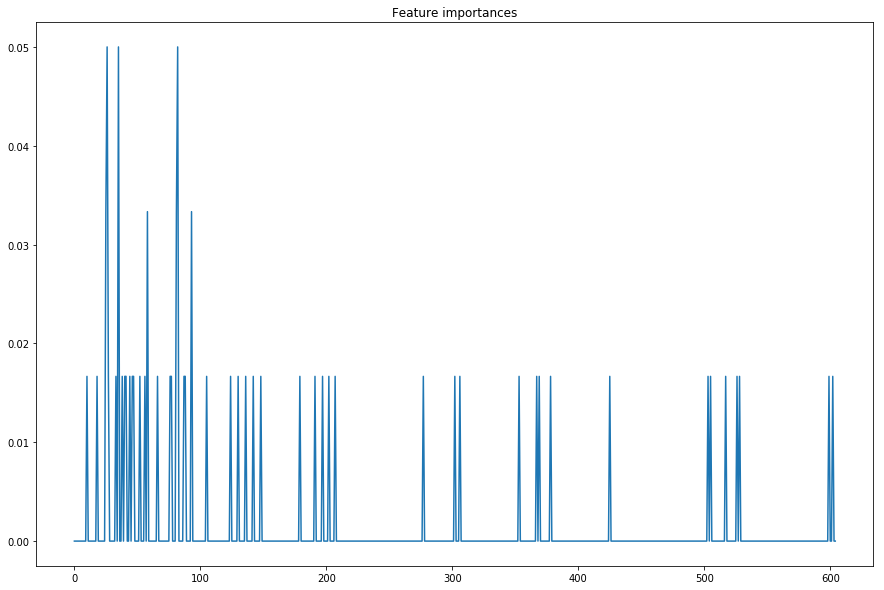

In [8]:
adafeatsUsed1 = ada_model1.feature_importances_
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.plot(adafeatsUsed1)
plt.show()

* Features below 0.01 should be dropped to improve the model